In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

In [28]:
df=pd.read_csv("C:/Users/DELL/Downloads/covid_19_data.csv")
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [29]:
df['ObservationDate'] = pd.to_datetime(df["ObservationDate"])
df_idx = df.set_index(["ObservationDate"], drop=True)
df_idx.head(5)

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [30]:
df_idx = df_idx.sort_index(axis=1, ascending=True)
df_idx = df_idx.iloc[::-1]

In [31]:
df_idx

,Confirmed,Country/Region,Deaths,Last Update,Province/State,Recovered,SNo
ObservationDate,,,,,,,
2020-03-21,0.0,The Gambia,0.0,2020-03-18T14:13:56,NaN,0.0,7617
2020-03-21,0.0,The Bahamas,0.0,2020-03-19T12:13:38,NaN,0.0,7616
2020-03-21,0.0,Republic of the Congo,0.0,2020-03-17T21:33:03,NaN,0.0,7615
2020-03-21,0.0,Puerto Rico,0.0,2020-03-17T16:13:14,NaN,0.0,7614
2020-03-21,0.0,Jersey,0.0,2020-03-17T18:33:03,NaN,0.0,7613
2020-03-21,0.0,Guernsey,0.0,2020-03-17T18:33:03,NaN,0.0,7612
2020-03-21,0.0,Guam,0.0,2020-03-18T19:14:33,NaN,0.0,7611
2020-03-21,0.0,Greenland,0.0,2020-03-19T09:33:04,NaN,0.0,7610
2020-03-21,0.0,France,0.0,2020-03-18T14:33:15,Reunion,0.0,7609


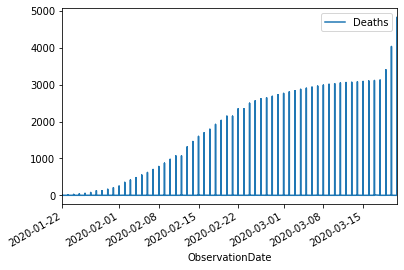

In [32]:
data = df_idx[['Deaths']]
data.plot(y='Deaths')

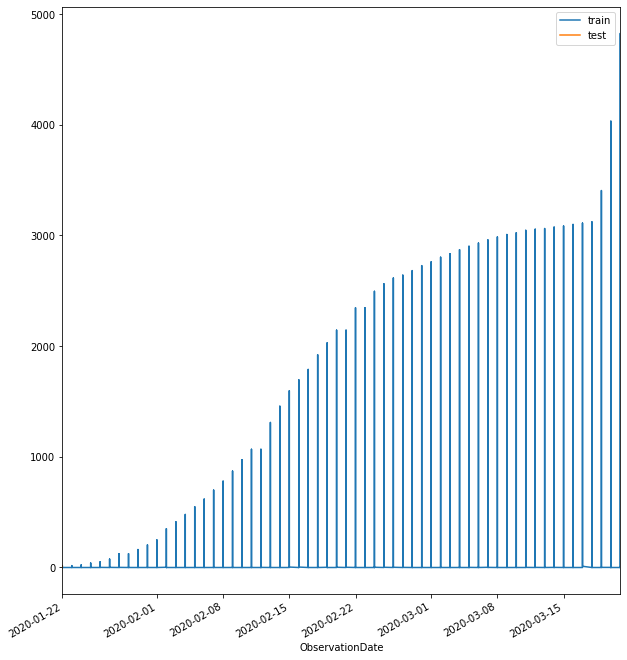

In [50]:
split_date = pd.Timestamp('22-01-2020')

train = data.loc[:split_date]
test = data.loc[split_date:]

ax = train.plot(figsize=(10,12))
test.plot(ax=ax)
plt.legend(['train', 'test'])
plt.show()

In [35]:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [36]:

train_sc_df = pd.DataFrame(train_sc, columns=['Y'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Y'], index=test.index)

for s in range(1,2):
    train_sc_df['X_{}'.format(s)] = train_sc_df['Y'].shift(s)
    test_sc_df['X_{}'.format(s)] = test_sc_df['Y'].shift(s)

X_train = train_sc_df.dropna().drop('Y', axis=1)
y_train = train_sc_df.dropna().drop('X_1', axis=1)

X_test = test_sc_df.dropna().drop('Y', axis=1)
y_test = test_sc_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

In [37]:

print('Train size: (%d x %d)'%(X_train.shape[0], X_train.shape[1]))
print('Test size: (%d x %d)'%(X_test.shape[0], X_test.shape[1]))

Train size: (7616 x 1)
Test size: (37 x 1)


In [38]:

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [39]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

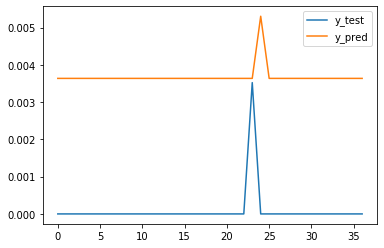

In [47]:
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['y_test','y_pred'])

In [41]:
from sklearn.metrics import r2_score

def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred)
print("R-squared is: %f"%r2_test)

R-squared is: -30372.542906


In [42]:

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

In [43]:

K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
7616/7616 [==============================] - 5s 612us/step - loss: 0.0023
Epoch 2/20
7616/7616 [==============================] - 1s 76us/step - loss: 0.0022
Epoch 3/20
7616/7616 [==============================] - 1s 78us/step - loss: 0.0021
Epoch 4/20
7616/7616 [==============================] - 1s 73us/step - loss: 0.0020
Epoch 5/20
7616/7616 [==============================] - 1s 83us/step - loss: 0.0020
Epoch 6/20
7616/7616 [==============================] - 1s 83us/step - loss: 0.0019
Epoch 7/20
7616/7616 [==============================] - 1s 75us/step - loss: 0.0019
Epoch 8/20
7616/7616 [==============================] - 1s 101us/step - loss: 0.0019
Epoch 9/20
7616/7616 [==============================] - 1s 110us/step - loss: 0.0019
Epoch 10/20
7616/7616 [==============================] - 1s 75us/step - loss: 0.0019
Epoch 11/20
7616/7616 [==============================] - 1s 79us/step - loss: 0.0019
Epoch 12/20
7616/7616 [==============================] - 1s 82us/step -

R-Squared: -39.657743


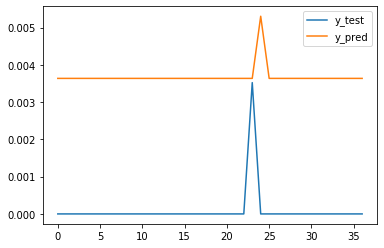

In [48]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['y_test','y_pred'])
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [45]:

K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
7616/7616 [==============================] - 2s 252us/step - loss: 0.0020
Epoch 2/20
7616/7616 [==============================] - 1s 135us/step - loss: 0.0020
Epoch 3/20
7616/7616 [==============================] - 1s 99us/step - loss: 0.0018
Epoch 4/20
7616/7616 [==============================] - 1s 104us/step - loss: 0.0018
Epoch 5/20
7616/7616 [==============================] - 1s 81us/step - loss: 0.0019
Epoch 6/20
7616/7616 [==============================] - 1s 85us/step - loss: 0.0019
Epoch 7/20
7616/7616 [==============================] - 1s 90us/step - loss: 0.0019
Epoch 8/20
7616/7616 [==============================] - 1s 107us/step - loss: 0.0018
Epoch 9/20
7616/7616 [==============================] - 1s 108us/step - loss: 0.0019
Epoch 10/20
7616/7616 [==============================] - 1s 110us/step - loss: 0.0019
Epoch 11/20
7616/7616 [==============================] - 1s 92us/step - loss: 0.0019
Epoch 12/20
7616/7616 [==============================] - 1s 94us/ste

R-Squared: -39.657743


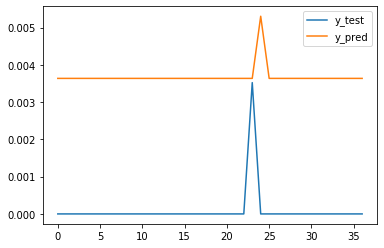

In [49]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['y_test','y_pred'])
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [53]:
df1=pd.read_csv("C:/Users/DELL/Pictures/test .csv")
df1.head()

,Date
0,3/12/2020
1,3/13/2020
2,3/14/2020
3,3/15/2020
4,3/16/2020


In [55]:
df1['Date'] = pd.to_datetime(df1["Date"])

In [56]:
df1.head()

,Date
0,2020-03-12
1,2020-03-13
2,2020-03-14
3,2020-03-15
4,2020-03-16


In [60]:
y_prediction = model.predict(df1)


In [66]:
y_prediction

array([[2.8071401e+17],
       [2.8072940e+17],
       [2.8074476e+17],
       ...,
       [2.8132659e+17],
       [2.8134188e+17],
       [2.8135719e+17]], dtype=float32)